## Project 2: Hypothesis Testing
Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased
with the introduction of a cut-resistant, longer-lasting golf ball.
1. Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of
the current and new golf balls.
2. Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your
recommendation for Par Inc.?
3. Provide descriptive statistical summaries of the data for each model. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,levene,shapiro,iqr
from statsmodels.stats.power import ttest_power
from statsmodels.stats.api import CompareMeans,DescrStatsW
import os
%matplotlib inline

C:\Users\tdhqv8\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Set the working directory
os.chdir(r"D:\Great Lakes Material\Project")

In [4]:
df= pd.read_excel("Golf.xls",encoding = "utf-8")

In [5]:
df.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [6]:
nrow,ncol=df.shape
print(f'There are {nrow} rows and {ncol} column')

There are 40 rows and 2 column


In [7]:
df.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


## Descriptive Statistics
After performing the five point summary analysis below is the summary:
1. Current variable SD: 8.75 and mean 270
2. New variable SD: 9.89 and mean 267.50
3. Variance for Variable Current:  76.61474 ; Variance for variable New:  97.94872
4. After looking at 5 point summary value we can conclude that there is no significant change in the driving distance of balls with and without coating.
5. The variance of New sample driving distances is 97.95 is 28% more than the variance of the driving distances of Current sample 76.61.

In [8]:
df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


Both the variables are of integer data type without any null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


## Data visulaization
After plotting the different types of graph we can conclude that:
1. Both variable are nearly normally distributed
2. Box plot showed that there are no outliers
3. From histogram we can see that both variable are close to normal distribution but Current variable is left scewed and New variable is right scewed.

In [10]:
sns.set(color_codes=True)

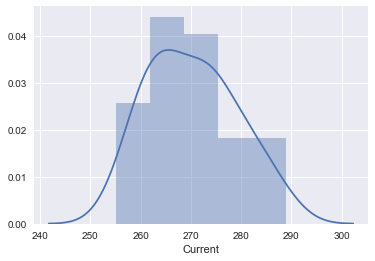

In [11]:
sns.distplot(df['Current'],kde='false')

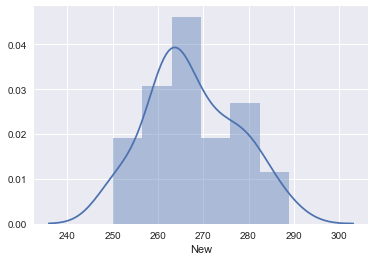

In [12]:
sns.distplot(df['New'],kde='false')

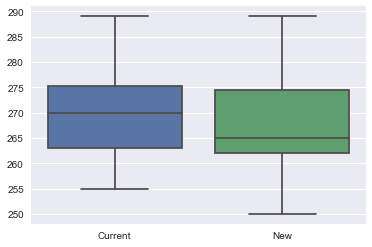

In [13]:
sns.boxplot(data=df)

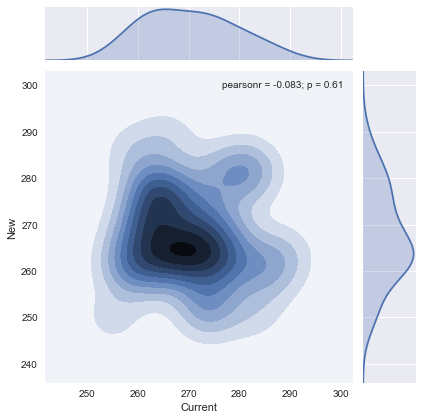

In [14]:
sns.jointplot(x="Current", y="New", data=df,kind="kde")

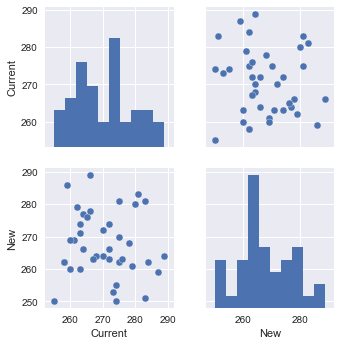

In [15]:
sns.pairplot(df)

## Missing value analysis
Given dataset does not contain any missing value neighter in NA or in any specific condition.

In [16]:
df.isnull().values.any()

False

In [17]:
df.isnull().sum()

Current    0
New        0
dtype: int64

In [18]:
for col in df.columns:
    print('Number of 0-entries for "{field_name}" feature:{amount}'.format(
        field_name=col,amount=np.count_nonzero(df[col]==0) ))

Number of 0-entries for "Current" feature:0
Number of 0-entries for "New" feature:0


# Hypothesis Testing
Sample size:40
Number of samples: 2
Unpaired variables.
DOF = 40+40-2 = 78
1. The level of significance (Alpha) = 0.05
2. The sample size N = 40 which is sufficiently large for a Z stat Test.But since the population standard deviation (Sigma) is unknown, we have to use a T stat Test.
3. Since the sole purpose of the test is to check whether there is any effect on driving distances due to the new coating, we could prefer a Two Tailed T Test.
4. As the data is normally distributed we will go for parametric approach hypothesis testing

## Hypothesis Formulation

1. Null Hypothesis:
    H0:µcurrent−µnew=0 (New coating does not have effect on driving distances)
2. Alternate Hypothesis:
    H1:µcurrent−µnew≠0 (New coating does have significant effect on driving distances)

In [19]:
t_stat, p_val=ttest_ind(df['Current'],df['New'])
print(t_stat, p_val)

1.3283615935245678 0.18793228491854663


In [22]:
cm = CompareMeans(DescrStatsW(df['Current']), DescrStatsW(df['New']))
print (cm.tconfint_diff(usevar='unequal'))

(-1.3849370614674914, 6.934937061467446)


In [29]:
cm1 = DescrStatsW(df['Current'])
print (cm1.tconfint_mean())

(267.47565965314044, 273.0743403468595)


In [30]:
cm2 = DescrStatsW(df['New'])
print (cm2.tconfint_mean())

(264.3348164103898, 270.6651835896102)


## T-Test Conclusion
1. In this scenario, the p value is 0.188 which is greater than the 0.05.
2. Hence, we failed to reject the Null Hypothesis.
3. Thus, accepting the Null Hypothesis that there is no significant change in driving distances due to the new coating.
4. 95% confidence interval for difference in mean is [-1.384937 TO 6.934937]

# levene test analysis
Levene test is done between two different data sets. The null and alternate hypothesis is as follows:
1. null hypothesis: H0: Variances are equal
2. alternate hypothesis: H1: At least one of the variances are unequal.

After performing levene test, p_value comes greater than 0.05 so we should accept null hypothesis and reject the alternate hypothesis

In [23]:
levene(df['Current'],df['New'])

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

# shapiro test analysis
shapiro test is used to check if the data is normally distributed for univariate distribution.The null and alternate hypothesis is as follows:
1. null hypothesis: H0: Data is normally distributed
2. alternate hypothesis: H1: Data is not normally distributed

After performing shapiro test, p_value comes greater than 0.05 so we should accept null hypothesis and reject the alternate hypothesis.

In [24]:
shapiro(df['Current'])

(0.9707046747207642, 0.378787100315094)

In [25]:
shapiro(df['New'])

(0.9678263664245605, 0.3064655363559723)

## Calaculate the power of test
The statistical power is the probability that the test correctly rejects the null hypothesis.

In [26]:
(np.mean(df['Current'])-np.mean(df['New']))/np.sqrt(((40-1)*np.var(df['Current'])+(40-1)*np.var(df['New'])) / 40+40-2)

0.19431534815781365

In [82]:
from statistics import mean, stdev
cohens_d = (mean(df['Current']) - mean(df['New'])) / (np.sqrt((stdev(df['Current']) ** 2 + stdev(df['New']) ** 2) / 2))
print(cohens_d)

0.2970306821820877


Power of test shows that there are 22% chances of rejecting the null hypothesis and 22% chance that null hypothesis will be false

In [62]:
print(ttest_power(0.194,nobs=40,alpha=0.05,alternative="two-sided"))

0.22350267230946855


# 95% confidence interval for difference between mean of samples

In [87]:
cm = CompareMeans(DescrStatsW(df['Current']), DescrStatsW(df['New']))
print (cm.tconfint_diff(usevar='unequal'))

(-1.3849370614674914, 6.934937061467446)


## Conclusion
1. Hypothesis Formulation<br>
    a. Null Hypothesis: H0:µcurrent−µnew=0 (New coating does not have effect on driving distances)  
    b. Alternate Hypothesis: H1:µcurrent−µnew≠0 (New coating does have significant effect on driving distances)<br>
2. After analyzing and performing the hypothesis testing on data the p-value comes greate than 0.05, hence We would like recomment Park Inc that :
    a. Statistically there is no effect of new coating on driving distance still we can suggest to check effect on weight and other characteristics such as size and shape of new balls.
    b. Also the above given sample is from only one golf course, so it would to perform test on different kind of golf course to take care of difference in ground.<br>
3. Descriptive statistics summary for each model is provided for each model<br>
4.  95 % confidence iterval values are as follows:<br>
   a. 95 % confidence iterval for Current ball population is (267.47565965314044, 273.0743403468595)  
   b. 95 % confidence iterval for New ball samples is (264.3348164103898, 270.6651835896102)  
   c. 95% confidence interval for difference between mean of samples is (-1.3849370614674914, 6.934937061467446)<br>
5. From the given data, using statistical approach we can conclude that there is no significant change in the driving distance due to new coating on the golf balls.